<a href="https://colab.research.google.com/github/JGuarnizo/Coding_Dojo/blob/main/Advanced_Machine_Learning/Week9_Dimensionality_Reduction/Ejercicio_ACP_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios de ACP

##Por: José Guarnizo

Instrucciones:

Tu tarea es hacer un análisis de componentes principales para agilizar un algoritmo de clasificación en un conjunto de datos multidimensional.

Usaremos el conjunto de datos de dígitos MNIST, que viene preinstalado en sklearn. Este conjunto de datos tiene imágenes de 8x8 pixeles de dígitos escritos a mano del 0 al 9. Tu tarea es clasificarlos para determinar qué dígitos son. Usa el ACP para decrementar las dimensiones en este conjunto de datos. Luego, usa un algoritmo de clasificación de tu elección para clasificar los dígitos. Nota que depende de ti determinar cuántos componentes principales usar para tu modelo, para conseguir un 95% de varianza en los datos.

In [ ]:
#Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape

(70000, 784)

In [ ]:
#Exploración de data
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Exploración de vector objetivo
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
#Matriz de caracteristicas y vector objetivo
X=mnist.data
y=mnist.target

In [ ]:
#Instancia del escalador y ajuste de matriz X
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [ ]:
#Análisis de componentes principales
pca = PCA()
pca.fit(scaled_df)

PCA()

In [ ]:
#Cálculo de número de componentes
varianza_acum=0
i=0
varianza=pca.explained_variance_ratio_[:350]
while varianza_acum<0.95:
  varianza_acum+=varianza[i]
  i+=1
print("Varianza de {:.2f}% alcanzada con {} componentes".format(varianza_acum*100, i-1))

Varianza de 95.00% alcanzada con 331 componentes


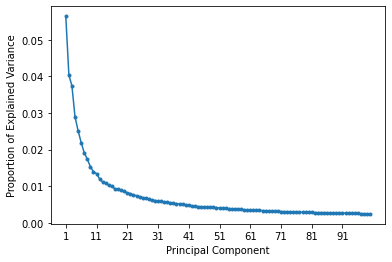

In [ ]:
#Gráfica de componentes principales
plt.plot(range(1, 101), pca.explained_variance_ratio_[:100], marker = '.')
plt.xticks(ticks = range(1, 101,10))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [ ]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
#Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True, n_jobs=-1)
forest.fit(X_train, y_train)
preds_forest=forest.predict(X_test)

#Parámetros de medición: precisión
forest_train = forest.score(X_train,y_train)
forest_test = forest.score(X_test,y_test)

In [ ]:
# Ajustar PCA
pca = PCA(n_components = 25)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

#Random Forest con PCA
forest_pca = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True, n_jobs=-1)
forest_pca.fit(X_train_pca, y_train)
preds_forest_pca=forest_pca.predict(X_test_pca)

#Parámetros de medición Random Forest con PCA:precisión
forest_train_PCA = forest_pca.score(X_train_pca,y_train)
forest_test_PCA = forest_pca.score(X_test_pca,y_test)


In [ ]:
# Ajustar PCA
pca2 = PCA(n_components = i)
X_train_pca2 = pca2.fit_transform(X_train_sc)
X_test_pca2 = pca2.transform(X_test_sc)

#Random Forest con PCA
forest_pca2 = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True, n_jobs=-1)
forest_pca2.fit(X_train_pca2, y_train)
preds_forest_pca2=forest_pca2.predict(X_test_pca2)

#Parámetros de medición Random Forest con PCA:precisión
forest_train_PCA2 = forest_pca2.score(X_train_pca2,y_train)
forest_test_PCA2 = forest_pca2.score(X_test_pca2,y_test)

In [ ]:
#Comparación de resultados
print("Modelo Random Forest N_Estimators=100")
print("\tPrecisión(Train)\tPrecisión(Test)")
print("PCA:331  =\t{:.3f}\t\t{:.3f}".format(forest_train_PCA2,forest_test_PCA2))
print("PCA:25   =\t{:.3f}\t\t{:.3f}".format(forest_train_PCA,forest_test_PCA))
print("SIN PCA  =\t{:.3f}\t\t{:.3f}".format(forest_train,forest_test))


Modelo Random Forest N_Estimators=100
	Precisión(Train)	Precisión(Test)
PCA:331  =	1.000		0.934
PCA:25   =	1.000		0.939
SIN PCA  =	1.000		0.968


## CONCLUSIÓN:

Aplicando PCA se logró reducir el número de variables. Para mantener una varianza superior al 95% se debreía reducir a 331 variables, pero se obtiene mejor resultado con 25 variables (utilizando el método gráfico). Al ser un ejercicio de clasificación multivariable, se eligió el modelo de Random Forest, y se comparó los resultados utilizando y sin utilizar PCA en la matriz de característica. Un mejor resultado se obtiene sin utilizar PCA, sin embargo utilizando solamente 25 característias principales se obtiene una precisi´n de 0.938, el cual es un valor excelente y el tiempo de ejecución se reduce significativamente.